In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 14


conti_list = []

In [2]:
covid = pd.read_csv('./owid-covid-data.csv')



In [3]:
covid.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
covid


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101539,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101540,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101541,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101542,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [104]:
covid.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [79]:
list_con = covid['continent'].unique()
print(list_con)

['Asia' nan 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [95]:
def continent_selector(conti):
    cond_1 = covid['continent']== conti
    conti_list = covid[cond_1]['location'].unique()
    print(conti_list)
    return covid[cond_1]


continent_selector('Europe')

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Faeroe Islands' 'Finland' 'France' 'Germany'
 'Gibraltar' 'Greece' 'Guernsey' 'Hungary' 'Iceland' 'Ireland'
 'Isle of Man' 'Italy' 'Jersey' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Ukraine' 'United Kingdom' 'Vatican']


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1017,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1018,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1019,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1020,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1021,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98463,VAT,Europe,Vatican,2021-07-06,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
98464,VAT,Europe,Vatican,2021-07-07,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
98465,VAT,Europe,Vatican,2021-07-08,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
98466,VAT,Europe,Vatican,2021-07-09,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN


In [90]:
#cond_1 = covid['continent']== 'Europe'
#covid[cond_1]

In [8]:
cond_2 = covid['location'] == 'Greece'
m_value = covid[cond_2]
m_value['total_cases'].max()
#m_value['total_cases'].value_counts().sort_index().plot();
#m_value.plot(x= 'date',y= 'new_cases');

437345.0

In [28]:
# ASIA LIST

cond_3 = covid['continent']== 'Asia'
asia_list = covid[cond_3]['location'].unique()
asia_list

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macao',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',
       'Northern Cyprus', 'Oman', 'Pakistan', 'Palestine', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka',
       'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor', 'Turkey',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam',
       'Yemen'], dtype=object)

In [33]:
cond_5 = covid['location'] == 'Afghanistan'
covid[cond_5]['total_cases'].max()


131586.0

In [103]:
# ASIA LIST


max_array= []
dic={}
for item in asia_list:
    
    cond_4 = covid['location'] == item
    max_array.append(covid[cond_4]['total_cases'].max())
dic =dict(zip(asia_list,max_array))
top_country= max(dic, key=dic.get)

print([top_country,dic[top_country]])

['India', 30795716.0]


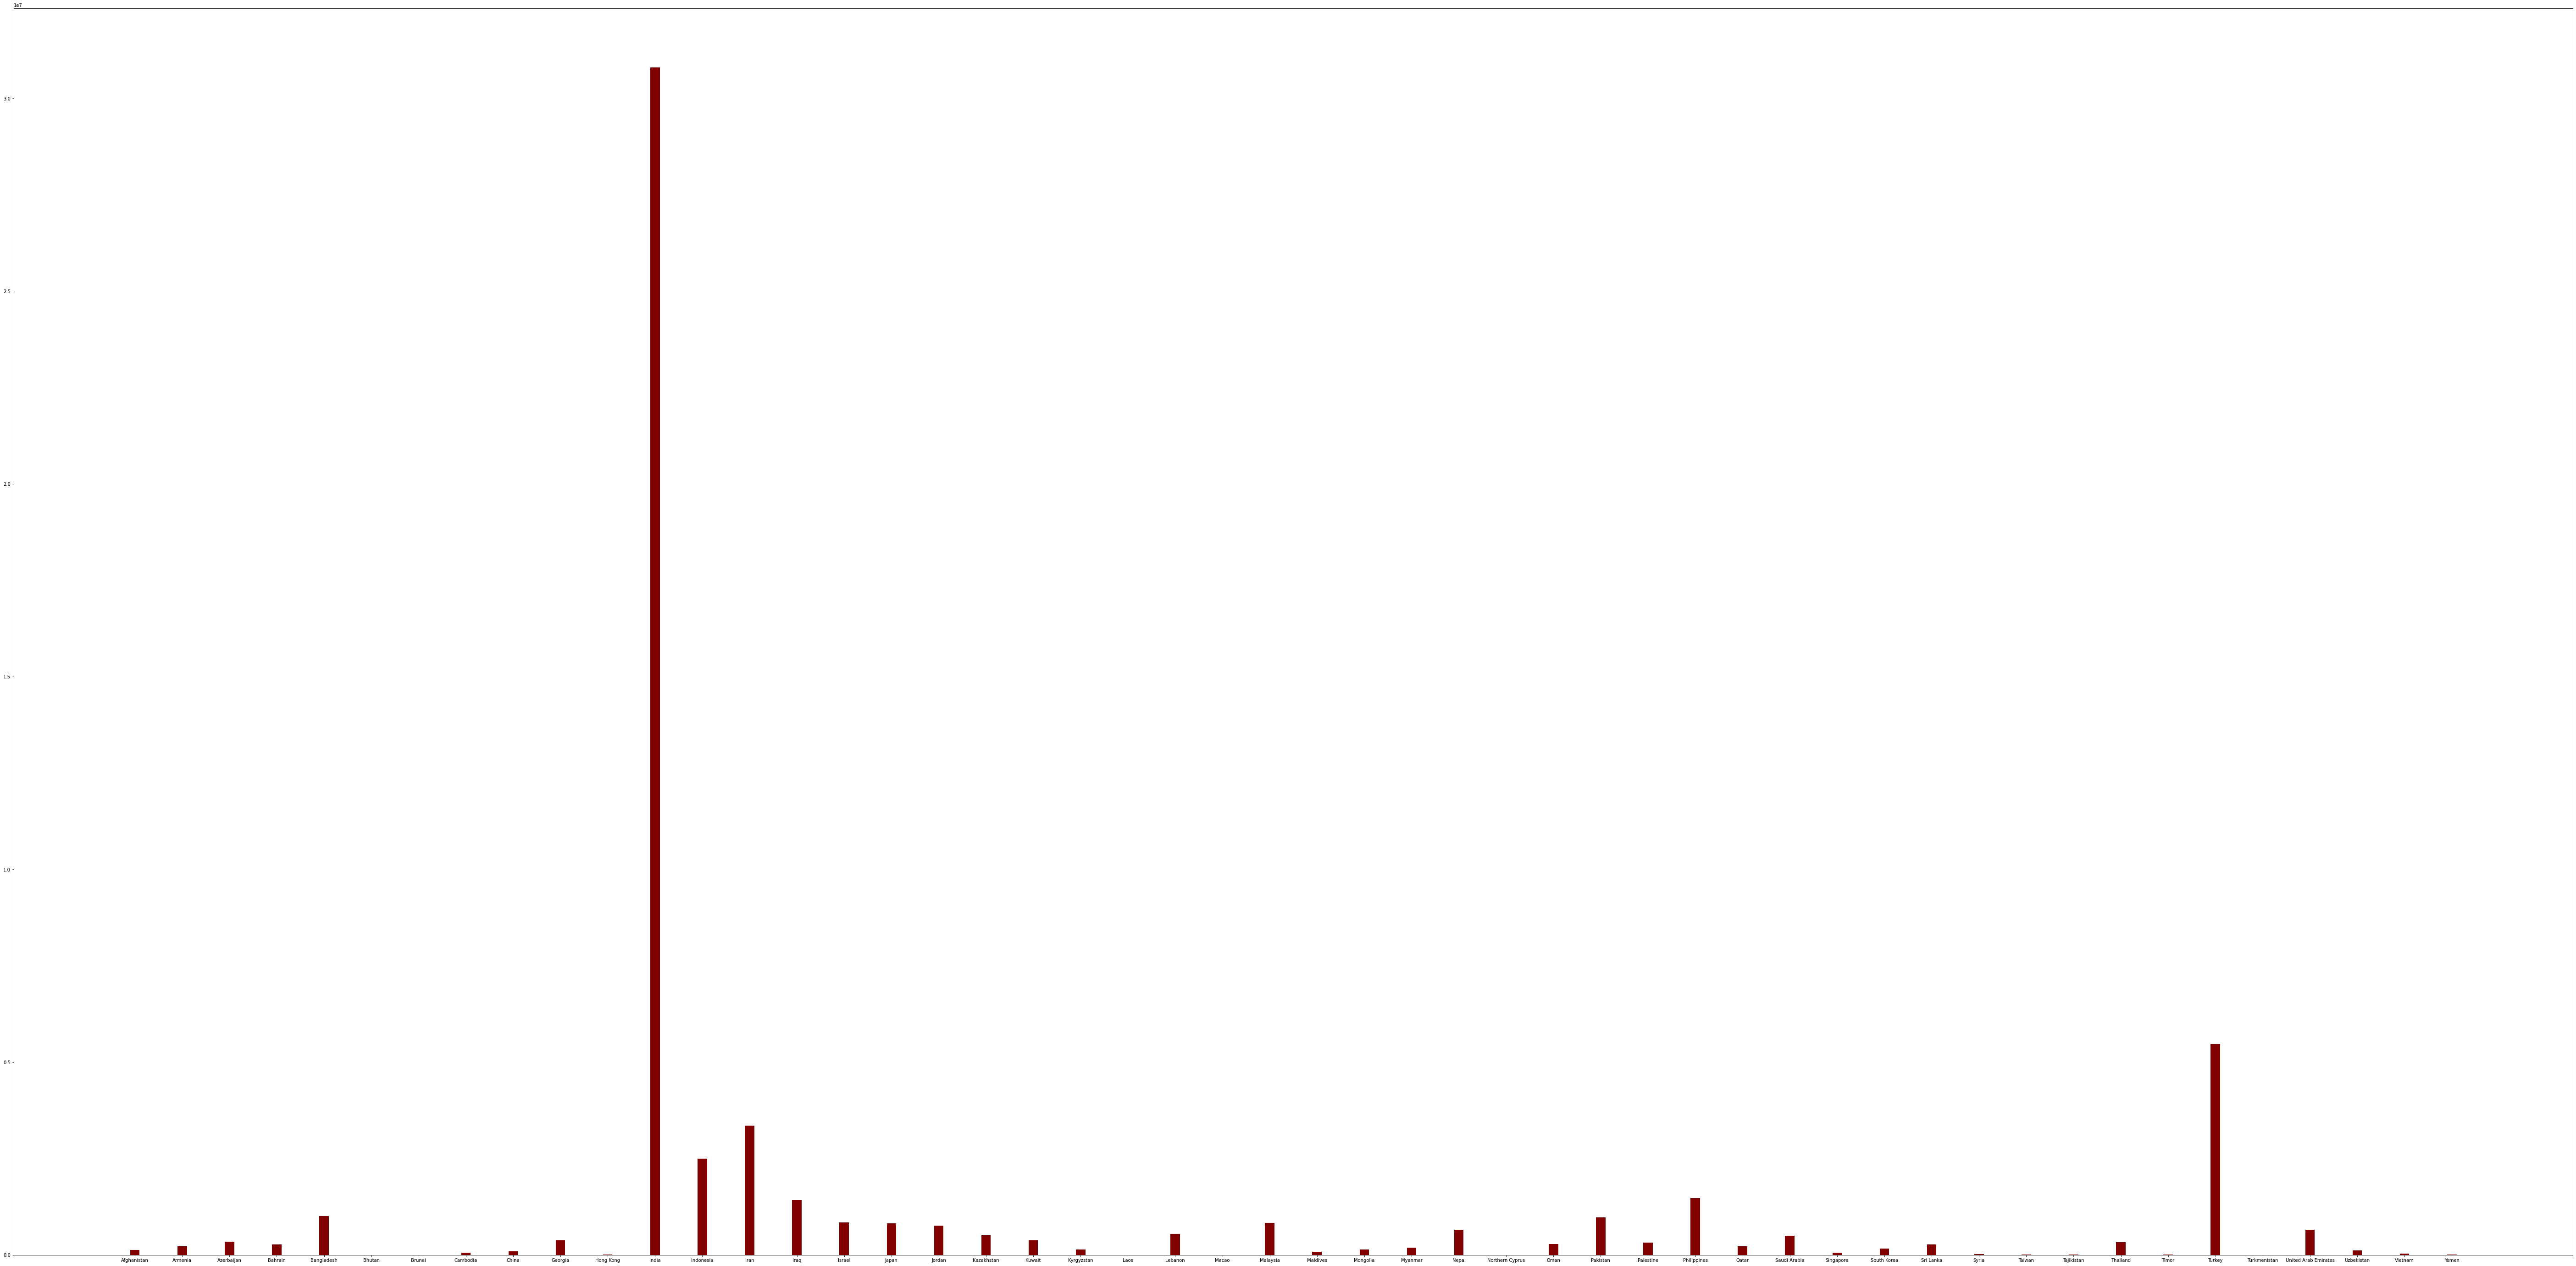

In [100]:
#covid.groupby(by=['location','total_cases']).count()
#.sum()
fig = plt.figure(figsize= (100,50))

plt.bar(asia_list,max_array, color = 'maroon',width=0.2)
plt.show()